# 1. Importing different libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Retrieve the data

In [2]:
df=pd.read_csv('Walmart.csv')

# 3. Data Preprocessing

In [3]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


#### 3.1 Null Handling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [5]:
df.isna().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

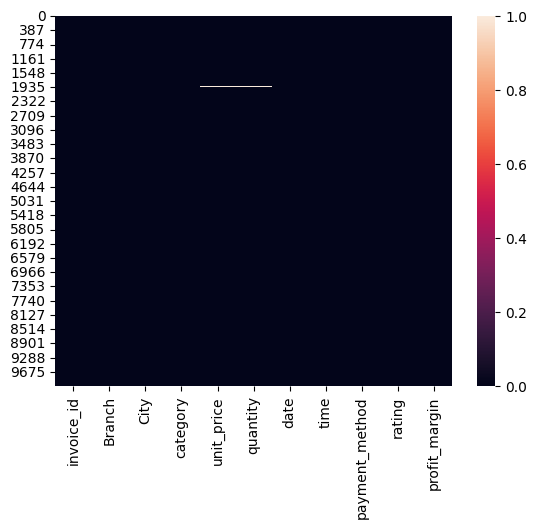

In [6]:
sns.heatmap(df.isna())
plt.show()

In [7]:
df.dropna(inplace=True)

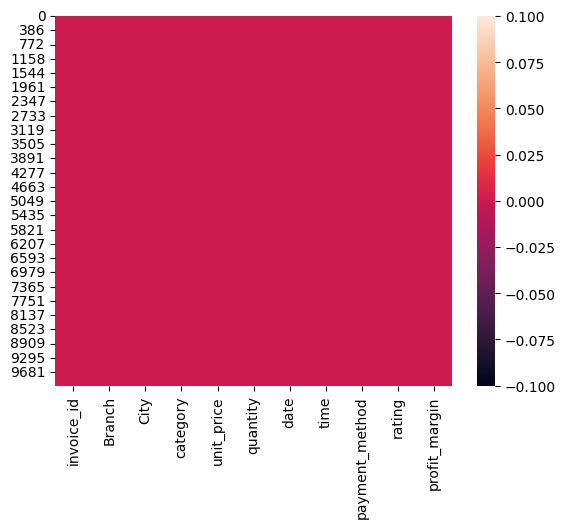

In [8]:
sns.heatmap(df.isna())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10020 non-null  int64  
 1   Branch          10020 non-null  object 
 2   City            10020 non-null  object 
 3   category        10020 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10020 non-null  object 
 7   time            10020 non-null  object 
 8   payment_method  10020 non-null  object 
 9   rating          10020 non-null  float64
 10  profit_margin   10020 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 939.4+ KB


#### 3.2 Checking Duplicates

In [10]:
print('Are there any duplicates ?',df.duplicated().any())

Are there any duplicates ? True


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print('Are there any duplicates ?',df.duplicated().any())

Are there any duplicates ? False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   object 
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 934.6+ KB


#### 3.3 Viewing statistics of numerical columns

In [14]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,2.355602,5.828839,0.393744
std,2886.217349,1.605455,1.763723,0.090659
min,1.000000,1.000000,3.000000,0.180000
25%,2524.000000,1.000000,4.000000,0.330000
50%,5016.000000,2.000000,6.000000,0.330000
75%,7508.000000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


#### 3.4 Hanndling categorical/Ordinal data

In [15]:
print('Number of branches =',df['Branch'].nunique())

Number of branches = 100


In [16]:
print('Number of cities ',df['City'].unique())              

Number of cities  ['San Antonio' 'Harlingen' 'Haltom City' 'Bedford' 'Irving' 'Denton'
 'Cleburne' 'Canyon' 'Grapevine' 'Texas City' 'San Angelo' 'Abilene'
 'Lewisville' 'Corpus Christi' 'Round Rock' 'Cedar Park' 'Conroe' 'Pharr'
 'Farmers Branch' 'Midland' 'Houston' 'Lancaster' 'Temple' 'Garland'
 'San Marcos' 'Huntsville' 'Mineral Wells' 'McAllen' 'Eagle Pass'
 'Mesquite' 'Big Spring' 'Mission' 'Hurst' 'Richardson' 'Pearland'
 'La Porte' 'Bryan' 'Allen' 'Rowlett' 'Port Arthur' 'Grand Prairie'
 'Georgetown' 'Southlake' 'Angleton' 'Missouri City' 'Fort Worth'
 'Del Rio' 'League City' 'Rockwall' 'Waxahachie' 'Killeen' 'Arlington'
 'McKinney' 'Alamo' 'Lufkin' 'Brownwood' 'Alice' 'Baytown' 'Lubbock'
 'North Richland Hills' 'Edinburg' 'College Station' 'Amarillo' 'Austin'
 'Euless' 'Sugar Land' 'Waco' 'Carrollton' 'Kerrville' 'Brownsville'
 'Frisco' 'Burleson' 'Dallas' 'Galveston' 'Mansfield' 'Flower Mound'
 'Sherman' 'Weatherford' 'Weslaco' 'Odessa' 'Pasadena' 'Schertz'
 'Longview' 'DeSot

In [17]:
print(df['category'].unique()) 

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [18]:
df['sale_date']=pd.to_datetime(df['date'])


C:\Users\User\AppData\Local\Temp\ipykernel_10360\3698849553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sale_date']=pd.to_datetime(df['date'])


In [19]:
df['tr_year']=df['sale_date'].dt.year

In [20]:
df['tr_month']=df['sale_date'].dt.month

In [21]:
df.drop('date',axis=1,inplace=True)

# 4. Data Exploration

In [22]:
df['unit_price']=df['unit_price'].str.replace('$',"").astype('float')

### 1. Calculating Sales

In [23]:
df['sales']=df['quantity']*df['unit_price']

In [24]:
print('Total Sales =',df['sales'].sum())

Total Sales = 1209726.38


### 2. Calculating Cost of Sales

In [25]:
df['cos']=round((1-df['profit_margin'])*df['unit_price']*df['quantity'],2)

In [26]:
print('Total Cost of Sales =',df['cos'].sum())

Total Cost of Sales = 733586.92


### 3. Gross Margin

In [27]:
print('Total Gross Margin =',round(df['sales'].sum()-df['cos'].sum()),2)

Total Gross Margin = 476139 2


#### 4. Yearwise Analysis of Sales,Cost of Sales and Gross Margin

In [28]:
print('Sales ',df.groupby('tr_year')['sales'].sum().sort_values(ascending=False))

Sales  tr_year
2019    307587.38
2021    233051.00
2023    232260.00
2020    219423.00
2022    217405.00
Name: sales, dtype: float64


#### From the above analysis 2019 was clearly the best in terms of revenue,there was a huge decrease in 2020,yoy change will reveal the percentage change.

In [29]:
print('Cost Of Sales ',df.groupby('tr_year')['cos'].sum().sort_values(ascending=False))

Cost Of Sales  tr_year
2019    186094.33
2021    140953.31
2023    140512.23
2020    133681.47
2022    132345.58
Name: cos, dtype: float64


#### The same observation made about revenue,is applicable to our cost of sales.

In [30]:
print('Gross Margin',df.groupby('tr_year')['sales'].sum().sort_values(ascending=False)-df.groupby('tr_year')['cos'].sum().sort_values(ascending=False))

Gross Margin tr_year
2019    121493.05
2021     92097.69
2023     91747.77
2020     85741.53
2022     85059.42
dtype: float64


In [31]:
Yearly_Sales=df.groupby('tr_year')['sales'].sum()

In [32]:
Yearly_Sales.shift(1)

tr_year
2019          NaN
2020    307587.38
2021    219423.00
2022    233051.00
2023    217405.00
Name: sales, dtype: float64

In [33]:
Yearly_Sales-Yearly_Sales.shift(1)

tr_year
2019         NaN
2020   -88164.38
2021    13628.00
2022   -15646.00
2023    14855.00
Name: sales, dtype: float64

#### The gross margin also resembles the revenue and cost in its movement.

In [34]:
round((Yearly_Sales-Yearly_Sales.shift(1))/Yearly_Sales.shift(1),2)

tr_year
2019     NaN
2020   -0.29
2021    0.06
2022   -0.07
2023    0.07
Name: sales, dtype: float64

#### Revenue fell by a staggering 29% from 2019 to 2020,this has somewhat stabilised judging by the modest 6%(2021) and 7%(2023)

In [35]:
df['gross_margin']=df.groupby('tr_year')['sales'].sum().sort_values(ascending=False)-df.groupby('tr_year')['cos'].sum().sort_values(ascending=False)

#### 4.5 Categorical Sales Analysis

In [36]:
print('Cost of Sales',df.groupby('category')['cos'].sum().sort_values(ascending=False))

Cost of Sales category
Fashion accessories       297165.97
Home and lifestyle        297036.42
Electronic accessories     47402.56
Food and beverages         31918.46
Sports and travel          31884.07
Health and beauty          28179.44
Name: cos, dtype: float64


#### Fashion and Home and Lifestyle are by far the greatest contributors to cost.

In [37]:
print('Sales',df.groupby('category')['sales'].sum().sort_values(ascending=False))

Sales category
Fashion accessories       489480.90
Home and lifestyle        489250.06
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Health and beauty          46851.18
Name: sales, dtype: float64


#### In terms of Revenue the largest sellers by far are Fashion and Home&Lifestyle,this is where the bulk of the revenue is generated.

In [38]:
gross_margin =df.groupby('category')['sales'].sum()-df.groupby('category')['cos'].sum()

In [39]:
gross_margin.sort_values(ascending=False)

category
Fashion accessories       192314.93
Home and lifestyle        192213.64
Electronic accessories     30772.47
Food and beverages         21552.82
Sports and travel          20613.86
Health and beauty          18671.74
dtype: float64

#### The gross margin also reinforces the observations made above.

In [40]:
df[['payment_method']].value_counts()

payment_method
Credit card       4256
Ewallet           3881
Cash              1832
Name: count, dtype: int64

#### The most utilised payment method in branches is displayed above.

In [41]:
df.groupby(['Branch','payment_method'])['invoice_id'].count().nlargest(10)

Branch   payment_method
WALM058  Credit card       145
WALM009  Credit card       139
WALM084  Credit card       125
WALM055  Credit card       122
WALM074  Cash              121
WALM030  Credit card       120
WALM069  Credit card       118
WALM046  Credit card       117
WALM087  Credit card       117
WALM003  Credit card       115
Name: invoice_id, dtype: int64

#### This displays the number of transactions by payment method and branch

In [42]:
print('Total Quantity Sold =',df['quantity'].sum())

Total Quantity Sold = 23483.0


In [43]:
print('Quantity by Payment Method',df.groupby('payment_method')['quantity'].sum().sort_values(ascending=False))

Quantity by Payment Method payment_method
Credit card    9567.0
Ewallet        8932.0
Cash           4984.0
Name: quantity, dtype: float64


#### 4.6 Sales Quantity Analysis

In [44]:
Qty=df.groupby('tr_year')['quantity'].sum()

In [45]:
Qty

tr_year
2019    5510.0
2020    4399.0
2021    4637.0
2022    4402.0
2023    4535.0
Name: quantity, dtype: float64

#### Displays the yearly Sales quantity 

In [46]:
Qty.shift(1)

tr_year
2019       NaN
2020    5510.0
2021    4399.0
2022    4637.0
2023    4402.0
Name: quantity, dtype: float64

In [47]:
Qty-Qty.shift(1)

tr_year
2019       NaN
2020   -1111.0
2021     238.0
2022    -235.0
2023     133.0
Name: quantity, dtype: float64

#### This displays the value of the change in sales quantity by year.As observed in the sales analysis the reason for the large drop in sales 2020,was as a result of a huge drop in sales quantities.

In [48]:
round((Qty-Qty.shift(1))*1.0/Qty.shift(1),2)

tr_year
2019     NaN
2020   -0.20
2021    0.05
2022   -0.05
2023    0.03
Name: quantity, dtype: float64

#### The huge drop in sales quantity between 2019 and 2020 was in effect 20% yoy,this resulted in a 29% decrement in sales value as mentioned in the sales revenue analysis.